# B_b_2 : Obtenir les données - Demande quotidienne d'électricité HQ

## Source : Historique de la demande d’électricité au Québec

Hydro-Québec

https://www.hydroquebec.com/documents-donnees/donnees-ouvertes/demande-electricite-quebec/

Site consulté le : 2023-11-13

### Description

Ensemble de données d’Hydro‑Québec sur la demande d’électricité au Québec en mégawatts. Mises à jour toutes les 15 minutes, elles montrent les variations du besoin quotidien d’électricité en fonction de l’heure de la journée.

### Fichiers ou services
[Demande d’électricité au Québec (fichier JSON)](https://www.hydroquebec.com/data/documents-donnees/donnees-ouvertes/json/demande.json)

L'ouverture du lien nous amène à une page présentant un fichier `json`. 

```json
{
  "dateStart" : "2023-11-12T00:00:00",
  "dateEnd" : "2023-11-14T00:00:00",
  "recentHour" : "2023-11-13T18:30:00",
  "indexDonneePlusRecent" : 170,
  "nbDateAvecData" : 171,
  "details" : [ {
    "date" : "2023-11-12T00:00:00",
    "valeurs" : {
      "demandeTotal" : 22150.0
    }
  }, {
    "date" : "2023-11-12T00:15:00",
    "valeurs" : {
      "demandeTotal" : 21938.0
    }
  }, {
    "date" : "2023-11-12T00:30:00",
    "valeurs" : {
      "demandeTotal" : 21942.0
    }
  }, {
    "date" : "2023-11-12T00:45:00",
    "valeurs" : {
      "demandeTotal" : 21883.0
    }
  }, {
    "date" : "2023-11-12T01:00:00",
    "valeurs" : {
      "demandeTotal" : 21653.0
    }
  }, {
      
  ...

 {
    "date" : "2023-11-13T17:45:00",
    "valeurs" : {
      "demandeTotal" : 28019.0
    }
  }, {
    "date" : "2023-11-13T18:00:00",
    "valeurs" : {
      "demandeTotal" : 28025.0
    }
  }, {
    "date" : "2023-11-13T18:15:00",
    "valeurs" : {
      "demandeTotal" : 27593.0
    }
  }, {
    "date" : "2023-11-13T18:30:00",
    "valeurs" : {
      "demandeTotal" : 27714.0
    }
  }, {
    "date" : "2023-11-13T18:45:00",
    "valeurs" : { }
  }, {
    "date" : "2023-11-13T19:00:00",
    "valeurs" : { }
  }, {
    "date" : "2023-11-13T19:15:00",
    "valeurs" : { }
  }, {
    "date" : "2023-11-13T19:30:00",
    "valeurs" : { }
  }, {
```

Lors de la consultation à 18h52, nous pouvons voir que les données sont disponibles quasiment en temps réel, soit jusqu'à 18h30. 

La journée d'hier est complètement présente. 

## Objectifs

Lire les données à tous les jours et les enregistrer pour utilisation future.

L'objectif serait, en 2024, d'avoir une série continue de données, à partir de l'importation historique de 2023, en plus des données quotidiennes qui seront lues à tous les jours. 


In [ ]:
%load_ext jupyter_black

In [149]:
import os
import pandas as pd
import json
import httpx
from datetime import date
import locale

locale.setlocale(locale.LC_ALL, "fr_CA")

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
col_HQ = "#FF9B00"

## Import des données en dataframe

Nous transformons les données sous `json` vers un dataframe.

In [4]:
url = "https://www.hydroquebec.com/data/documents-donnees/donnees-ouvertes/json/demande.json"
r = httpx.get(url)
data = json.loads(r.text)

In [142]:
df = (
    pd.DataFrame.from_records(data["details"])
    .rename(columns={"valeurs": "MW"})
    .set_index("date")
)
df.index = pd.to_datetime(df.index)
df["MW"] = df["MW"].apply(lambda x: x.get("demandeTotal"))
df = df.dropna()

In [52]:
df

,MW
date,
2023-11-12 00:00:00,22150.0
2023-11-12 00:15:00,21938.0
2023-11-12 00:30:00,21942.0
2023-11-12 00:45:00,21883.0
2023-11-12 01:00:00,21653.0
...,...
2023-11-13 17:45:00,28019.0
2023-11-13 18:00:00,28025.0
2023-11-13 18:15:00,27593.0


## Visualisation des données importées

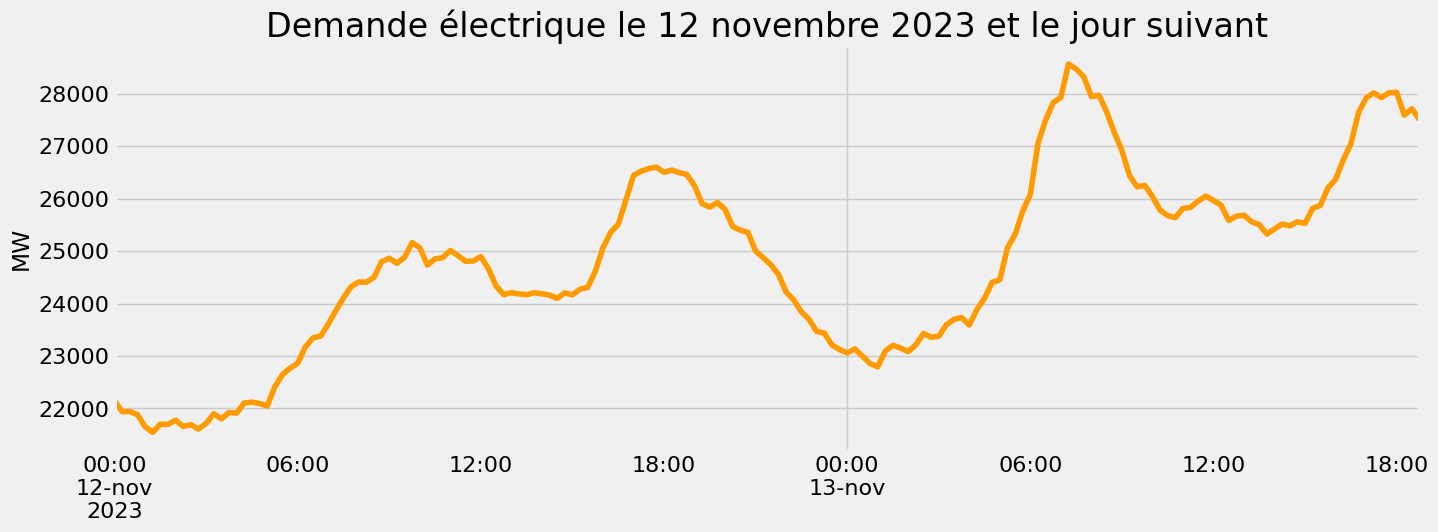

In [151]:
df.plot(
    style="-",
    ms=1.5,
    fontsize=16,
    figsize=(15, 5),
    xlabel="",
    ylabel="MW",
    legend=False,
    color=col_HQ,
)
plt.title(
    f"Demande électrique le {str(df.index.date[0].strftime('%d %B %Y'))} et le jour suivant",
    fontsize=24,
)
plt.show()

## Regrouper par heure

Nous n'avons pas besoin d'autant de précision (15 minutes) pour la suite et nous voulons uniformiser avec les données historiques qui sont horaires. Nous effectuons donc une moyenne par heure des données recueillies.

In [132]:
df["date_"] = df.index.date
df["heure_"] = df.index.hour
df["dh"] = df["date_"].astype(str) + " " + df["heure_"].astype(str) + ":00:00"
df

,MW,date_,heure_,dh
date,,,,
2023-11-12 00:00:00,22150.0,2023-11-12,0,2023-11-12 0:00:00
2023-11-12 00:15:00,21938.0,2023-11-12,0,2023-11-12 0:00:00
2023-11-12 00:30:00,21942.0,2023-11-12,0,2023-11-12 0:00:00
2023-11-12 00:45:00,21883.0,2023-11-12,0,2023-11-12 0:00:00
2023-11-12 01:00:00,21653.0,2023-11-12,1,2023-11-12 1:00:00
...,...,...,...,...
2023-11-13 17:45:00,28019.0,2023-11-13,17,2023-11-13 17:00:00
2023-11-13 18:00:00,28025.0,2023-11-13,18,2023-11-13 18:00:00
2023-11-13 18:15:00,27593.0,2023-11-13,18,2023-11-13 18:00:00


Après avoir fait généré les dates heures sur une même colonne, nous pouvons regroupper par ce champs.

Nous utilisons la moyenne sur les 4 lectures horaires.  Nous laissons aussi tomber la denière mesure, qui peut être incomplète. 

In [136]:
df_grouped = pd.DataFrame(df.groupby(["dh"]).MW.mean())
df_grouped.index = pd.to_datetime(df_grouped.index)
df_grouped.sort_index(inplace=True)
df_grouped = df_grouped.iloc[:-1]
df_grouped.index.names = ["date"]

df_grouped

,MW
date,
2023-11-12 00:00:00,21978.25
2023-11-12 01:00:00,21648.75
2023-11-12 02:00:00,21683.00
2023-11-12 03:00:00,21834.50
2023-11-12 04:00:00,22058.50
2023-11-12 05:00:00,22467.50
2023-11-12 06:00:00,23189.25
2023-11-12 07:00:00,23976.00
2023-11-12 08:00:00,24529.50


Vérifions si la visualisation fait du sens après ces opérations. 

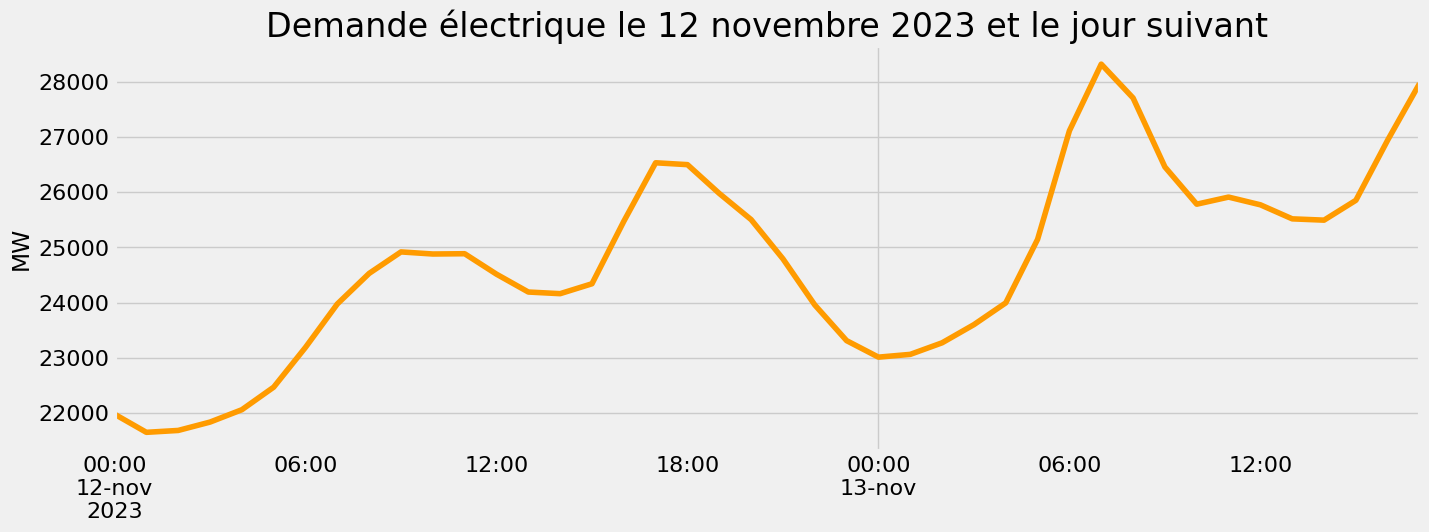

In [146]:
df_grouped.plot(
    ms=1.5,
    fontsize=16,
    figsize=(15, 5),
    xlabel="",
    ylabel="MW",
    legend=False,
    color=col_HQ,
)
plt.title(
    f"Demande électrique le {str(df.index.date[0].strftime('%d %B %Y'))} et le jour suivant",
    fontsize=24,
)
plt.show()

Nous pouvons voir que la courbe est plus lisse, mais toujours semblable.

## Enregistrer les données historiques dans le fichier *interim* 

Nous pouvons conserver ces données dans un fichier parquet.  Ce dernier sera mis à jour de façon quotidienne.

In [154]:
path_to_interim_data = "../data/interim/"
file = "quotidien_demande_HQ.parquet"

df_grouped.to_parquet(
    path=os.path.join(path_to_interim_data, file),
    engine="pyarrow",
)



## Création d'une fonction

Maintenant que nous avons effectué l'exercice d'importer une fois les données, nous voulons :

- lire le fichier enregistré ;
- lire les dernières données à jour sur le site d'HQ ;
- les concaténer ;
- enregistrer le fichier à nouveau ;
- enregistrer le graphique.

In [192]:
def update_demande_quotidienne_HQ():
    url = "https://www.hydroquebec.com/data/documents-donnees/donnees-ouvertes/json/demande.json"
    path_to_interim_data = "../data/interim/"
    path_to_img = "../reports/figures/"
    file_parquet = "quotidien_demande_HQ.parquet"
    file_image = "quotidient_demande_HQ.png"

    # Obtenir les données sur le site HQ
    r = httpx.get(url)
    data = json.loads(r.text)

    df = (
        pd.DataFrame.from_records(data["details"])
        .rename(columns={"valeurs": "MW"})
        .set_index("date")
    )
    df.index = pd.to_datetime(df.index)
    df["MW"] = df["MW"].apply(lambda x: x.get("demandeTotal"))
    df = df.dropna()

    # Enregistrer le graphique
    df.plot(
        style="-",
        ms=1.5,
        fontsize=16,
        figsize=(15, 5),
        xlabel="",
        ylabel="MW",
        legend=False,
        color=col_HQ,
    )

    plt.title(
        f"Demande électrique le {str(df.index.date[0].strftime('%d %B %Y'))} et le jour suivant",
        fontsize=24,
    )
    plt.tight_layout()
    plt.savefig(os.path.join(path_to_img, file_image), dpi=300)

    # Regrouper par heure
    df["date_"] = df.index.date
    df["heure_"] = df.index.hour
    df["dh"] = df["date_"].astype(str) + " " + df["heure_"].astype(str) + ":00:00"
    df_grouped = pd.DataFrame(df.groupby(["dh"]).MW.mean())
    df_grouped.index = pd.to_datetime(df_grouped.index)
    df_grouped.sort_index(inplace=True)
    df_grouped = df_grouped.iloc[:-1]
    df_grouped.index.names = ["date"]

    # Lire les données existantes et combiner avec les nouvelles données
    nouveau_df = pd.read_parquet(
        path=os.path.join(path_to_interim_data, file_parquet),
        engine="pyarrow",
    ).combine_first(df_grouped)

    #  Enregistrer le nouveau fichier par dessus l'existant
    nouveau_df.to_parquet(
        path=os.path.join(path_to_interim_data, file_parquet),
        engine="pyarrow",
    )

    print(
        f"Le fichier de données quotidiennes possède maintenant {nouveau_df.shape[0]} heures."
    )

    return nouveau_df

Le fichier de données quotidiennes possède maintenant 45 heures.


,MW
date,
2023-11-12 00:00:00,21978.25
2023-11-12 01:00:00,21648.75
2023-11-12 02:00:00,21683.00
2023-11-12 03:00:00,21834.50
2023-11-12 04:00:00,22058.50
2023-11-12 05:00:00,22467.50
2023-11-12 06:00:00,23189.25
2023-11-12 07:00:00,23976.00
2023-11-12 08:00:00,24529.50


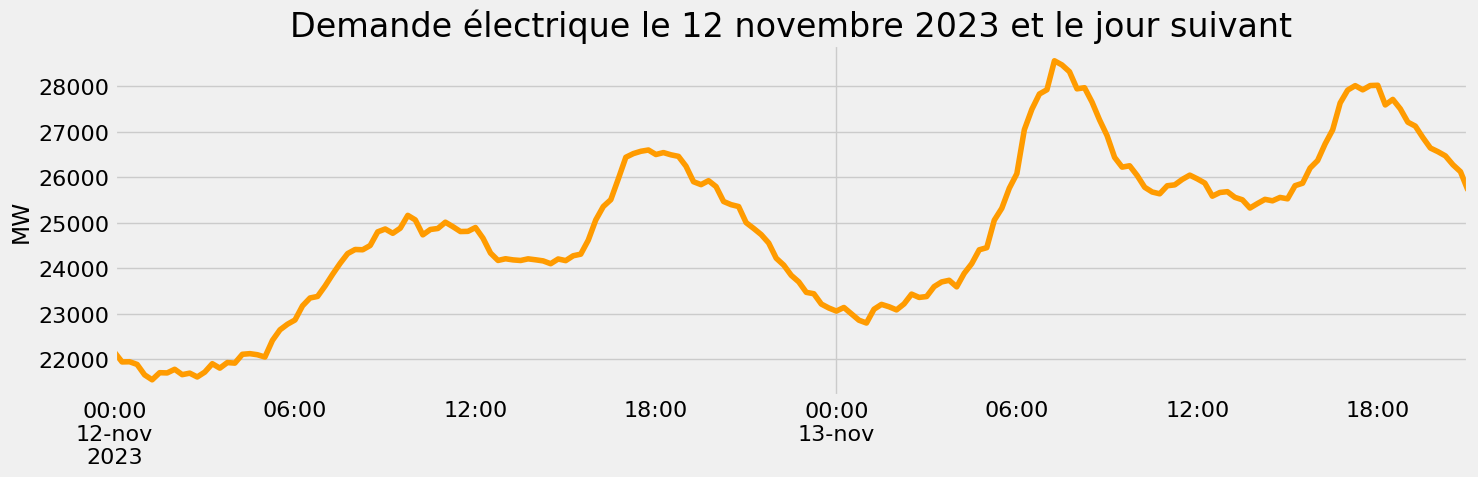

In [193]:
update_demande_quotidienne_HQ()

Nous pouvons maintenant insérer cette fonction dans notre fichier d'import dans le but d'automatiser le tout. 